### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Comment: 
In the exercise a simple neural network consisting of only one neuron is used to fit the function $y=2x+1$.
The neuron output, as showed in the network summary, depends from two parameters that need to be optimized so that given an input $x$, the output is as close as possible to $2x+1$.

Let's start considering the case $\sigma=0$. By varying the number of epochs $N_{\mathrm{epochs}}$ and the number of data points $N_{\mathrm{train}}$ we can get an intuition about how the neuron learns. The initial parameters are presumably chosen at random, then they are optimized through an optimization algorythm ('SGD' in this case). The optimization can be improved in two ways: 1) by increasing $N_{\mathrm{train}}$ we give the neuron more points to learn from; 2) with larger $N_{\mathrm{epochs}}$ we increase the number of times the neuron can learn from a given set.
To clarify, it is like studying something from many different books (1st method, diversification) compared to studying something by reading over and over the same book (2nd method, intensification). 

While for the simple task of linear fitting without noise both methods can be applied almost exclusively, the situation is more complicated even for slightly more complicated tasks such as the linear fit with noise. In fact, when the $\sigma$ is not equal to zero and $N_{\mathrm{train}}$ is small, if we increase $N_{\mathrm{epochs}}$ we might overfit the data. On the contrary, with large $N_{\mathrm{train}}$ we risk to underfit the data unless we hugely increase $N_{\mathrm{epochs}}$. Hence, for an efficient learning we should balance $N_{\mathrm{epochs}}$ and $N_{\mathrm{train}}$.

In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

### Generating sets of data for training and validation

In [5]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

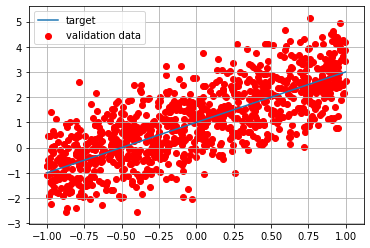

In [5]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

### One neuron sequential model

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


###  Fitting model

In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=300,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/300
4/4 [==============================] - 0s 29ms/step - loss: 5.1909 - mse: 5.1909 - val_loss: 5.8747 - val_mse: 5.8747
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 4.9270 - mse: 4.9270 - val_loss: 5.6266 - val_mse: 5.6266
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 4.7198 - mse: 4.7198 - val_loss: 5.3466 - val_mse: 5.3466
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 4.4904 - mse: 4.4904 - val_loss: 5.0217 - val_mse: 5.0217
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 4.2323 - mse: 4.2323 - val_loss: 4.8145 - val_mse: 4.8145
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 4.0593 - mse: 4.0593 - val_loss: 4.6253 - val_mse: 4.6253
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 3.9083 - mse: 3.9083 - val_loss: 4.4469 - val_mse: 4.4469
Epoch 8/300
4/4 [==============================] - 0s 8ms/step - loss: 3.7566 - mse: 3.7566 - va

4/4 [==============================] - 0s 7ms/step - loss: 1.1780 - mse: 1.1780 - val_loss: 1.1872 - val_mse: 1.1872
Epoch 65/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1706 - mse: 1.1706 - val_loss: 1.1785 - val_mse: 1.1785
Epoch 66/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1650 - mse: 1.1650 - val_loss: 1.1712 - val_mse: 1.1712
Epoch 67/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1627 - mse: 1.1627 - val_loss: 1.1621 - val_mse: 1.1621
Epoch 68/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1548 - mse: 1.1548 - val_loss: 1.1481 - val_mse: 1.1481
Epoch 69/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1467 - mse: 1.1467 - val_loss: 1.1417 - val_mse: 1.1417
Epoch 70/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1432 - mse: 1.1432 - val_loss: 1.1374 - val_mse: 1.1374
Epoch 71/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1404 - mse: 1.1404 - val_loss

Epoch 127/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0481 - mse: 1.0481 - val_loss: 0.9724 - val_mse: 0.9724
Epoch 128/300
4/4 [==============================] - 0s 8ms/step - loss: 1.0481 - mse: 1.0481 - val_loss: 0.9742 - val_mse: 0.9742
Epoch 129/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0479 - mse: 1.0479 - val_loss: 0.9755 - val_mse: 0.9755
Epoch 130/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0480 - mse: 1.0480 - val_loss: 0.9801 - val_mse: 0.9801
Epoch 131/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0492 - mse: 1.0492 - val_loss: 0.9804 - val_mse: 0.9804
Epoch 132/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0483 - mse: 1.0483 - val_loss: 0.9748 - val_mse: 0.9748
Epoch 133/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0485 - mse: 1.0485 - val_loss: 0.9800 - val_mse: 0.9800
Epoch 134/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0485 - m

4/4 [==============================] - 0s 7ms/step - loss: 1.0432 - mse: 1.0432 - val_loss: 0.9469 - val_mse: 0.9469
Epoch 252/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0455 - mse: 1.0455 - val_loss: 0.9490 - val_mse: 0.9490
Epoch 253/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0437 - mse: 1.0437 - val_loss: 0.9509 - val_mse: 0.9509
Epoch 254/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0439 - mse: 1.0439 - val_loss: 0.9492 - val_mse: 0.9492
Epoch 255/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0434 - mse: 1.0434 - val_loss: 0.9507 - val_mse: 0.9507
Epoch 256/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0447 - mse: 1.0447 - val_loss: 0.9505 - val_mse: 0.9505
Epoch 257/300
4/4 [==============================] - 0s 6ms/step - loss: 1.0438 - mse: 1.0438 - val_loss: 0.9525 - val_mse: 0.9525
Epoch 258/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0438 - mse: 1.0438 - v

### Results

In [8]:
# return weights and biases
model.get_weights()

[array([[1.7678756]], dtype=float32), array([0.86875975], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 488us/step - loss: 0.9542 - mse: 0.9542

Test loss: 0.9542456269264221
Test accuracy: 0.9542456269264221


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 499us/step - loss: 0.0353 - mse: 0.0353

Test loss: 0.03530769795179367
Test accuracy: 0.03530769795179367


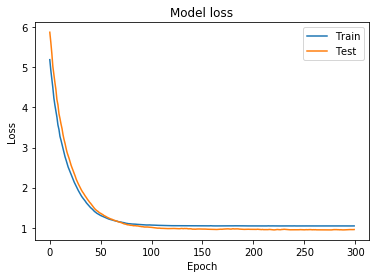

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

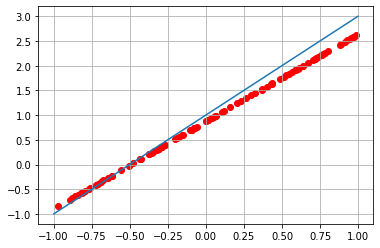

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.2

Given the function to fit:
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$, the exercise asks us to explore some of the main parameters and options of a neural network. 
The main question that arises when trying to solve a problem through a neural network is how should the network be structured in terms of number of neurons, number of layers, activation function and so on. Unfortunately, there is no analytical or easy answer and the main theorems in the field (e.g. universal approximation theorem) demonstrate the general capabilites of such networks but without giving advice about how to build a neuron structure for a specific problem. Therefore, the only path left is to experimentally try as many configurations as possible and to deduce some overall qualitative properties. Therefore, based on the results obtained with the code and plots below, here are the main conclusions that could be drawn: 

#### - Network size: layer depth and width
- The simplest neural possible is a single neuron, the same we used for Exercise 11.1. This structure allows to only linearly approximate our function;
- We then add a new layer to the single neuron (layer 1 + output layer (1 neuron)). For any number of neuron in the new layer, we always get the same linear approximation. The reason may be that this structure can be seen as a linear combination of single linear neurons, hence determining an overall linear behaviour.
- A decent improvement is shown if we add a second layer (layer 1 + layer 2 + output layer (1 neuron)). The model is here able to recognize the main curvature (the one with negative second derivative) and to reproduce it through a piecewise defined function composed of 3/4 linear parts. The smaller curvature is rarely caught and it contributes in general to just a slight slop increase in the final linear fitting piece. At this point the best configuration seems to be made of 20+20(+1) number of neurons per layer;
- Further refinements can be obtained by adding other layers. A third layer appears to give its best in a 25+25+25(+1) structure. Alternatively, we could opt for smaller layer but deeper network. For instance, 6/7 5 neurons layers give a pretty satisfactory result.

The choice for a proper neuron structure revolves around the search for "machine learning equilibrium" between overfitting and underfitting. As implied above, the fact that there is an optimal structure means that excessively increasing the network complexity is not only useless, but also counterproductive. While simple models tend to have low variance and high bias, hence underfitting the data (like the straght line trying to fit a polynomial curve), complex models have lower bias (i.e. the training error is lower) but higher variance. Therefore, the target should be finding a complexity critical point with intermediate values of bias and variance in order to minimise the output error. 

#### - Activation Function
Different activation functions are tried:
- Relu, selu and elu: they are three similar non-saturating activation function. The main difference is at $x<0$ where relu is $0$, selu is $a*x$ and elu is $exp(x)-1$. The results, obtained for a 25+25+25(+1) network with the same activation function for all neurons, are similar. Nevertheless, Relu seems a slight better choice and this could be related to the reason why it is the most common activation function.

#### - Optimizer and cost function
Regardind the optimizers, we try different options. There are no significative differences even if the Adam optimizer, which is essentially an upgraded SGD, seems a bit more efficient, at least in our exercise. In fact, at the end of 30 epochs the Adam loss is about 1/4 of the classic SGD one.
On the other side, we compare two cost functions: Mean squared error and mean absolute error. By observing the final loss function (the metric, which is mse in both cases) MSE seems more efficient. The reason can be understood by looking at the fit with a simple network, such as 25+1, that allows only a linear interpolation. The corresponding fitting straight line is steeper when MAE is adopted. This is beacuse the contribution to the overall cost function
of points that are very different from the target value is bigger with MSE than MAE, due to the squaring operation.

### Out of range predictions
The last plots of exercise 02 clearly show that the prediction capability of the neural model is completely lost out of the training range.

In [482]:
#target parameters
def poly_func(x):
    a=4.
    b=-3.
    c=-2.
    d=3.
    
    return a + b*x + c*x**2 + d*x**3

In [483]:
# generate training inputs
np.random.seed(0)
n_train=1800
x_train = np.random.uniform(-1, 1, 1800)
x_valid = np.random.uniform(-1, 1, int(n_train/9))
x_valid.sort()
y_target = poly_func(x_valid)  # ideal (target) polinomial function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(poly_func(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(poly_func(x_valid), sigma)

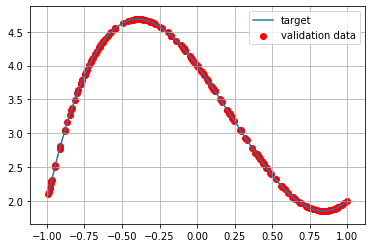

In [484]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [485]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(1,)))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='softplus'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [486]:
# get a summary of our composed model
model.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_421 (Dense)            (None, 5)                 10        
_________________________________________________________________
dense_422 (Dense)            (None, 25)                150       
_________________________________________________________________
dense_423 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_424 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_425 (Dense)            (None, 1)                 26        
Total params: 1,486
Trainable params: 1,486
Non-trainable params: 0
_________________________________________________________________


In [487]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),verbose=0)

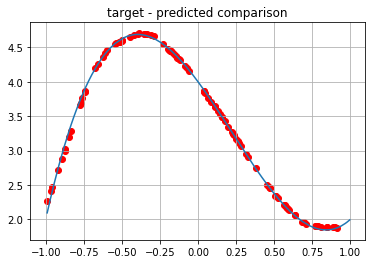

In [488]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("target - predicted comparison")
plt.grid(True)
plt.show()

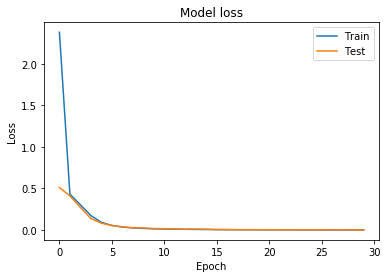

final training loss: 0.0015216473257169127
final test loss: 0.0015978700248524547 


In [489]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(f"final training loss: {history.history['loss'][-1]}\nfinal test loss: {history.history['val_loss'][-1]} ")

### Out of range prediction

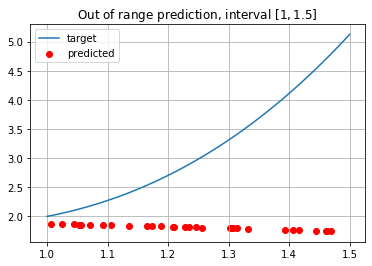

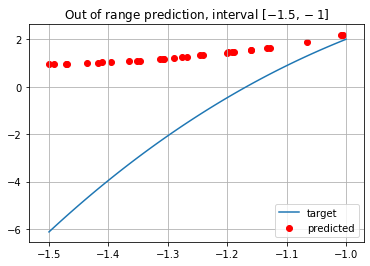

In [502]:
x_oor = np.random.uniform(1, 1.5, 30)
x=np.linspace(1,1.5,100)
y_target=poly_func(x)
y_predicted = model.predict(x_oor)
plt.scatter(x_oor, y_predicted,color='r',label="predicted")
plt.plot(x, y_target,label="target")
plt.grid(True)
plt.title("Out of range prediction, interval $[1,1.5]$")
plt.legend()
plt.show()


x_oor = np.random.uniform(-1.5, -1, 30)
x=np.linspace(-1.5,-1,100)
y_target=poly_func(x)
y_predicted = model.predict(x_oor)
plt.scatter(x_oor, y_predicted,color='r',label="predicted")
plt.title("Out of range prediction, interval $[-1.5,-1]$")
plt.plot(x, y_target,label="target")
plt.grid(True)
plt.legend()
plt.show()

## Ex 10.3
In this last exercise we adapt the models above for the function
$$
f(x)=\sin(x^2+y^2)
$$

In [503]:
#target parameters
def func(x,y):
    return np.sin(x**2+y**2)

In [504]:
# generate training inputs
p_train = np.random.uniform(-1.5, 1.5, size=(1800,2))

p_valid = np.random.uniform(-1.5, 1.5, size=(200,2))

sigma = 0. # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(p_train[:,0],p_train[:,1]), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(p_valid[:,0],p_valid[:,1]), sigma)

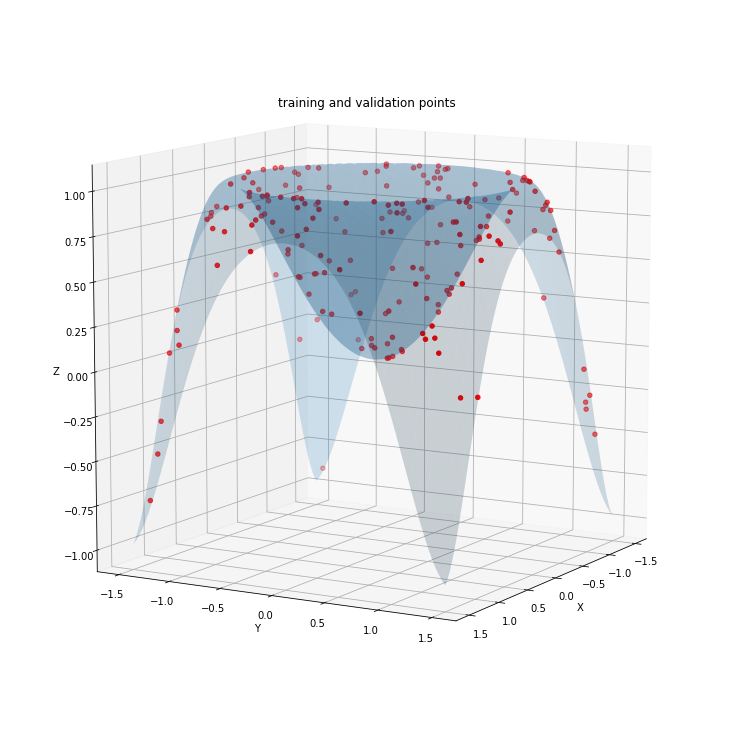

In [509]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#generating training and validation data
X, Y = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))

z_target = func(X,Y)  # ideal (target) polinomial function

fig = plt.figure(figsize=(10,10))
fig.suptitle("training and validation points",y=0.875)
ax = Axes3D(fig)
ax.view_init(10,30)

# Plot the surface
ax.scatter(p_valid[:,0],p_valid[:,1], z_valid, label='validation points', color='red', depthshade='False')
ax.plot_surface(X,Y, z_target, label='target', alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [512]:
model = Sequential()

model.add(Dense(108, input_dim=2, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1,activation='relu'))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.summary()

In [513]:
history = model.fit(x=p_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(p_valid, z_valid), verbose=1)

Epoch 1/50
57/57 [==============================] - 0s 2ms/step - loss: 0.2008 - mse: 0.2008 - val_loss: 0.1427 - val_mse: 0.1427
Epoch 2/50
57/57 [==============================] - 0s 961us/step - loss: 0.1433 - mse: 0.1433 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 3/50
57/57 [==============================] - 0s 930us/step - loss: 0.1404 - mse: 0.1404 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 4/50
57/57 [==============================] - 0s 1ms/step - loss: 0.1386 - mse: 0.1386 - val_loss: 0.1362 - val_mse: 0.1362
Epoch 5/50
57/57 [==============================] - 0s 933us/step - loss: 0.1371 - mse: 0.1371 - val_loss: 0.1344 - val_mse: 0.1344
Epoch 6/50
57/57 [==============================] - 0s 988us/step - loss: 0.1353 - mse: 0.1353 - val_loss: 0.1337 - val_mse: 0.1337
Epoch 7/50
57/57 [==============================] - 0s 928us/step - loss: 0.1339 - mse: 0.1339 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 8/50
57/57 [==============================] - 0s 983us/step - loss: 0.1321

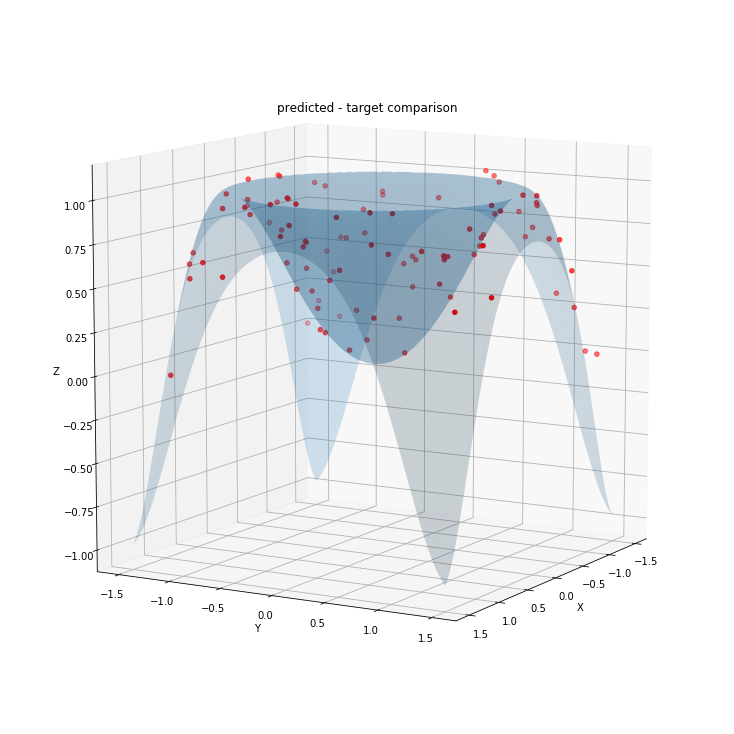

In [515]:
p_predicted = np.random.uniform(-1.5, 1.5, size=(100,2))
z_predicted = model.predict(p_predicted)



# Create matplotlib Figure and Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.view_init(10,30)
plt.title("predicted - target comparison",y=0.92)

# Plot the surface
ax.scatter(p_predicted[:,0],p_predicted[:,1], z_predicted, label='prediction points', color='red', depthshade='False')
ax.plot_surface(X,Y, z_target, label='target', alpha=0.2)

#ax.set_zlim(0,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

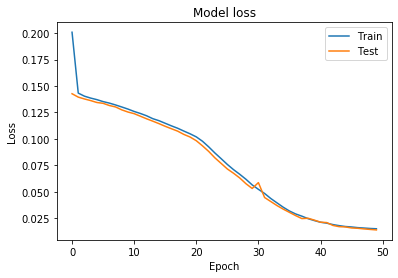

final training loss: 0.015194703824818134
final test loss: 0.014109971933066845 


In [516]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(f"final training loss: {history.history['loss'][-1]}\nfinal test loss: {history.history['val_loss'][-1]} ")